In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_1d import hjb_modified, hjb_modified_jump_process
from numba import njit

ODE:

\begin{align}
0 = \max_e  &-\delta \phi(y) + \delta\eta\log e  + \frac{d \phi}{d y}(y) \mu_2 e + (\eta-1)\left(\lambda_1 + \lambda_2y\right)\mu_2 e + K \frac{\exp\left[\rho(y-\bar{y})\right]}{1-\exp\left[\rho(y-\bar{y})\right]} \left(\bar{\phi}(y) - \phi(y)\right)\\
\end{align}

FOC of $e$ gives :

$$
e^* = -\frac{\delta \eta}{\frac{\partial \phi}{\partial y}(y)\mu_2 + (\eta-1)(\lambda_1 + \lambda_2y)\mu_2}
$$

In [2]:
# Model parameters
η = .032
δ = .01
μ_2 = 1.86/1000.
# Damage setting
λ_1 = 1.7675/10000
λ_2 = 0.0022*2
λ_bar = 2.
# Three damages
λ_2p_state = np.array([0., 0.0197*2, 0.3853*2])
λ_2p_prior = np.array([0.4875, 0.4875, 0.025])

In [3]:
# Grid setting
n_y = 100
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

# Solve for each damage function
ϕ_list = []
e_list = []
for λ_2p in λ_2p_state:
    pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, λ_2p)
    ϕ, e = hjb_modified(y_grid, model_paras=pde_paras, v0=None,
                        ϵ=.5, tol=1e-8, max_iter=10_000, bc=(0, 0), impose_bc=(False, False))
    ϕ_list.append(ϕ)
    e_list.append(e)

Iteration 1: LHS Error: 0.0012399145351601527; RHS Error 0.0014606468243815764
Iteration 2: LHS Error: 0.0011876787746095087; RHS Error 0.0013754243917120973
Iteration 3: LHS Error: 0.0011513420067673081; RHS Error 0.001295435545230069
Iteration 4: LHS Error: 0.0011211796888625876; RHS Error 0.0012301280923770648
Iteration 5: LHS Error: 0.0010928298046417526; RHS Error 0.0011747999870947738
Iteration 6: LHS Error: 0.0010651126685647314; RHS Error 0.0011269963952911556
Iteration 7: LHS Error: 0.0010380723005553967; RHS Error 0.0010854283491834888
Iteration 8: LHS Error: 0.0010122356929496094; RHS Error 0.0010492024024021658
Iteration 9: LHS Error: 0.0009880115799277486; RHS Error 0.0010175416981931856
Iteration 10: LHS Error: 0.0009655211360293393; RHS Error 0.0009897225098399402
Iteration 11: LHS Error: 0.000944787890739443; RHS Error 0.0009650857300969329
Iteration 12: LHS Error: 0.0009256793369696766; RHS Error 0.0009430601679140025
Iteration 13: LHS Error: 0.0009080176987850807; RHS

Iteration 324: LHS Error: 8.717791566691113e-05; RHS Error 8.70492644193206e-05
Iteration 325: LHS Error: 8.663350623228094e-05; RHS Error 8.650418080192134e-05
Iteration 326: LHS Error: 8.609270819978643e-05; RHS Error 8.596271508456424e-05
Iteration 327: LHS Error: 8.555549511321536e-05; RHS Error 8.542484073718307e-05
Iteration 328: LHS Error: 8.502184074286878e-05; RHS Error 8.489053145710164e-05
Iteration 329: LHS Error: 8.449171908303521e-05; RHS Error 8.43597611666217e-05
Iteration 330: LHS Error: 8.396510434967308e-05; RHS Error 8.383250401070876e-05
Iteration 331: LHS Error: 8.344197097816253e-05; RHS Error 8.330873435463692e-05
Iteration 332: LHS Error: 8.292229362102943e-05; RHS Error 8.278842678171455e-05
Iteration 333: LHS Error: 8.240604714557231e-05; RHS Error 8.227155609097912e-05
Iteration 334: LHS Error: 8.189320663168353e-05; RHS Error 8.175809729498774e-05
Iteration 335: LHS Error: 8.138374736979537e-05; RHS Error 8.124802561758902e-05
Iteration 336: LHS Error: 8.08

Iteration 663: LHS Error: 1.13710100215908e-05; RHS Error 1.1168504096815057e-05
Iteration 664: LHS Error: 1.1304741364959181e-05; RHS Error 1.1102190881315125e-05
Iteration 665: LHS Error: 1.1238865994481206e-05; RHS Error 1.1036271266377383e-05
Iteration 666: LHS Error: 1.1173381515239278e-05; RHS Error 1.0970742854760573e-05
Iteration 667: LHS Error: 1.1108285547539731e-05; RHS Error 1.0905603264398252e-05
Iteration 668: LHS Error: 1.1043575726621402e-05; RHS Error 1.0840850128242458e-05
Iteration 669: LHS Error: 1.0979249702752769e-05; RHS Error 1.0776481094210903e-05
Iteration 670: LHS Error: 1.091530514089889e-05; RHS Error 1.071249382505828e-05
Iteration 671: LHS Error: 1.0851739720818543e-05; RHS Error 1.0648885998288554e-05
Iteration 672: LHS Error: 1.0788551136980962e-05; RHS Error 1.05856553060744e-05
Iteration 673: LHS Error: 1.0725737098274402e-05; RHS Error 1.0522799455107154e-05
Iteration 674: LHS Error: 1.0663295328033895e-05; RHS Error 1.0460316166568842e-05
Iteration 

Iteration 1008: LHS Error: 1.556884682479831e-06; RHS Error 4.036882247212582e-06
Iteration 1009: LHS Error: 1.5480323714844868e-06; RHS Error 4.045611813151837e-06
Iteration 1010: LHS Error: 1.539230796765434e-06; RHS Error 4.054291388998514e-06
Iteration 1011: LHS Error: 1.5304796642662266e-06; RHS Error 4.062921264100694e-06
Iteration 1012: LHS Error: 1.521778681692898e-06; RHS Error 4.071501726108815e-06
Iteration 1013: LHS Error: 1.5131275585555937e-06; RHS Error 4.080033060988573e-06
Iteration 1014: LHS Error: 1.504526005891016e-06; RHS Error 4.08851555301615e-06
Iteration 1015: LHS Error: 1.4959737366093684e-06; RHS Error 4.09694948480489e-06
Iteration 1016: LHS Error: 1.4874704652445558e-06; RHS Error 4.105335137312123e-06
Iteration 1017: LHS Error: 1.4790159079125509e-06; RHS Error 4.113672789840799e-06
Iteration 1018: LHS Error: 1.4706097825889497e-06; RHS Error 4.121962720062466e-06
Iteration 1019: LHS Error: 1.4622518087620273e-06; RHS Error 4.130205204002637e-06
Iteration 

Iteration 1351: LHS Error: 2.2283694871283455e-07; RHS Error 5.353049315379621e-06
Iteration 1352: LHS Error: 2.2158324872179058e-07; RHS Error 5.354287022429427e-06
Iteration 1353: LHS Error: 2.2033662430698264e-07; RHS Error 5.355517746521835e-06
Iteration 1354: LHS Error: 2.1909703530609281e-07; RHS Error 5.356741527276737e-06
Iteration 1355: LHS Error: 2.178644417510922e-07; RHS Error 5.3579584040647655e-06
Iteration 1356: LHS Error: 2.1663880397926327e-07; RHS Error 5.359168416031474e-06
Iteration 1357: LHS Error: 2.1542008252217748e-07; RHS Error 5.3603716021197786e-06
Iteration 1358: LHS Error: 2.1420823810569534e-07; RHS Error 5.361568001024421e-06
Iteration 1359: LHS Error: 2.1300323178874425e-07; RHS Error 5.362757651243793e-06
Iteration 1360: LHS Error: 2.1180502471351836e-07; RHS Error 5.3639405910395e-06
Iteration 1361: LHS Error: 2.1061357832752314e-07; RHS Error 5.365116858457061e-06
Iteration 1362: LHS Error: 2.094288542447975e-07; RHS Error 5.366286491333074e-06
Iterat

Iteration 1700: LHS Error: 3.118056644824119e-08; RHS Error 5.542285657294784e-06
Iteration 1701: LHS Error: 3.100518065901614e-08; RHS Error 5.542458822665173e-06
Iteration 1702: LHS Error: 3.083077795840161e-08; RHS Error 5.542631017087631e-06
Iteration 1703: LHS Error: 3.065735285079363e-08; RHS Error 5.542802246002033e-06
Iteration 1704: LHS Error: 3.048489985446601e-08; RHS Error 5.542972514824946e-06
Iteration 1705: LHS Error: 3.0313413487692564e-08; RHS Error 5.543141828937047e-06
Iteration 1706: LHS Error: 3.014288835201384e-08; RHS Error 5.543310193688333e-06
Iteration 1707: LHS Error: 2.997331907672596e-08; RHS Error 5.54347761439985e-06
Iteration 1708: LHS Error: 2.980470027724724e-08; RHS Error 5.543644096367385e-06
Iteration 1709: LHS Error: 2.9637026638384967e-08; RHS Error 5.543809644850727e-06
Iteration 1710: LHS Error: 2.9470292858824187e-08; RHS Error 5.543974265086573e-06
Iteration 1711: LHS Error: 2.930449372051669e-08; RHS Error 5.544137962269443e-06
Iteration 1712

Iteration 122: LHS Error: 0.0003028991953603205; RHS Error 0.00030418427933416744
Iteration 123: LHS Error: 0.00030011617195925544; RHS Error 0.0003013899130660351
Iteration 124: LHS Error: 0.0002973580184098962; RHS Error 0.0002986204737430514
Iteration 125: LHS Error: 0.0002946245510110912; RHS Error 0.00029587577882273484
Iteration 126: LHS Error: 0.00029191558579137744; RHS Error 0.00029315564544814656
Iteration 127: LHS Error: 0.00028923093855573456; RHS Error 0.0002904598904911361
Iteration 128: LHS Error: 0.0002865704249350315; RHS Error 0.0002877883305985519
Iteration 129: LHS Error: 0.000283933860436833; RHS Error 0.0002851407822408623
Iteration 130: LHS Error: 0.0002813210604979133; RHS Error 0.0002825170617625916
Iteration 131: LHS Error: 0.00027873184053728295; RHS Error 0.000279916985434075
Iteration 132: LHS Error: 0.0002761660160100765; RHS Error 0.00027734036950408916
Iteration 133: LHS Error: 0.0002736234024612455; RHS Error 0.0002747870302529325
Iteration 134: LHS Err

Iteration 439: LHS Error: 5.828120861034458e-05; RHS Error 5.843940642098327e-05
Iteration 440: LHS Error: 5.7993229036532035e-05; RHS Error 5.815123130236576e-05
Iteration 441: LHS Error: 5.770667187236789e-05; RHS Error 5.786447995694428e-05
Iteration 442: LHS Error: 5.742153009755113e-05; RHS Error 5.757914535316314e-05
Iteration 443: LHS Error: 5.713779672635033e-05; RHS Error 5.7295220494166775e-05
Iteration 444: LHS Error: 5.685546480746484e-05; RHS Error 5.701269841762858e-05
Iteration 445: LHS Error: 5.657452742384439e-05; RHS Error 5.6731572195580274e-05
Iteration 446: LHS Error: 5.629497769260583e-05; RHS Error 5.6451834934242084e-05
Iteration 447: LHS Error: 5.601680876472781e-05; RHS Error 5.617347977385559e-05
Iteration 448: LHS Error: 5.5740013824912005e-05; RHS Error 5.589649988851529e-05
Iteration 449: LHS Error: 5.546458609154148e-05; RHS Error 5.56208884860015e-05
Iteration 450: LHS Error: 5.519051881637538e-05; RHS Error 5.5346638807615266e-05
Iteration 451: LHS Erro

Iteration 763: LHS Error: 1.1705079608584357e-05; RHS Error 1.6326048025159037e-05
Iteration 764: LHS Error: 1.164722181055955e-05; RHS Error 1.633096972193616e-05
Iteration 765: LHS Error: 1.1589649963436588e-05; RHS Error 1.6335900112149067e-05
Iteration 766: LHS Error: 1.1532362654206874e-05; RHS Error 1.6340838935311678e-05
Iteration 767: LHS Error: 1.1475358476814579e-05; RHS Error 1.634578593372665e-05
Iteration 768: LHS Error: 1.141863603226767e-05; RHS Error 1.6350740852456305e-05
Iteration 769: LHS Error: 1.1362193928332598e-05; RHS Error 1.6355703439303296e-05
Iteration 770: LHS Error: 1.1306030779825726e-05; RHS Error 1.6360673444783377e-05
Iteration 771: LHS Error: 1.1250145208183127e-05; RHS Error 1.636565062210091e-05
Iteration 772: LHS Error: 1.1194535841876907e-05; RHS Error 1.6370634727127446e-05
Iteration 773: LHS Error: 1.1139201315998881e-05; RHS Error 1.6375625518375654e-05
Iteration 774: LHS Error: 1.1084140272413223e-05; RHS Error 1.6380622756977093e-05
Iteration

Iteration 1084: LHS Error: 2.3851233716537523e-06; RHS Error 1.767603423069613e-05
Iteration 1085: LHS Error: 2.3733317462970582e-06; RHS Error 1.767876678024355e-05
Iteration 1086: LHS Error: 2.361598411187993e-06; RHS Error 1.7681490120512015e-05
Iteration 1087: LHS Error: 2.349923078182048e-06; RHS Error 1.768420427067808e-05
Iteration 1088: LHS Error: 2.338305460591883e-06; RHS Error 1.7686909249988174e-05
Iteration 1089: LHS Error: 2.326745273117936e-06; RHS Error 1.768960507775915e-05
Iteration 1090: LHS Error: 2.3152422319178134e-06; RHS Error 1.7692291773377302e-05
Iteration 1091: LHS Error: 2.3037960545368996e-06; RHS Error 1.7694969356292132e-05
Iteration 1092: LHS Error: 2.2924064598944804e-06; RHS Error 1.7697637846022206e-05
Iteration 1093: LHS Error: 2.281073168255987e-06; RHS Error 1.770029726214854e-05
Iteration 1094: LHS Error: 2.2697959014134073e-06; RHS Error 1.7702947624313736e-05
Iteration 1095: LHS Error: 2.2585743823522186e-06; RHS Error 1.770558895222349e-05
Ite

Iteration 1412: LHS Error: 4.6932349088979475e-07; RHS Error 1.8196702188485038e-05
Iteration 1413: LHS Error: 4.670029062764369e-07; RHS Error 1.8197474267950232e-05
Iteration 1414: LHS Error: 4.646937948882268e-07; RHS Error 1.8198243129218395e-05
Iteration 1415: LHS Error: 4.623961000760346e-07; RHS Error 1.8199008784679845e-05
Iteration 1416: LHS Error: 4.6010976528787495e-07; RHS Error 1.8199771246685433e-05
Iteration 1417: LHS Error: 4.5783473441585176e-07; RHS Error 1.8200530527545623e-05
Iteration 1418: LHS Error: 4.555709516157469e-07; RHS Error 1.820128663953017e-05
Iteration 1419: LHS Error: 4.5331836123763125e-07; RHS Error 1.820203959486844e-05
Iteration 1420: LHS Error: 4.5107690790913146e-07; RHS Error 1.8202789405752124e-05
Iteration 1421: LHS Error: 4.488465366742078e-07; RHS Error 1.820353608433079e-05
Iteration 1422: LHS Error: 4.4662719263233175e-07; RHS Error 1.8204279642715035e-05
Iteration 1423: LHS Error: 4.444188213409417e-07; RHS Error 1.8205020092975548e-05
I

Iteration 1737: LHS Error: 9.371198672614156e-08; RHS Error 1.8332475988072985e-05
Iteration 1738: LHS Error: 9.324856342640686e-08; RHS Error 1.8332664180526414e-05
Iteration 1739: LHS Error: 9.278743166862835e-08; RHS Error 1.8332851533151473e-05
Iteration 1740: LHS Error: 9.232858011465339e-08; RHS Error 1.833303804958295e-05
Iteration 1741: LHS Error: 9.187199744020713e-08; RHS Error 1.833322373343807e-05
Iteration 1742: LHS Error: 9.141767251530375e-08; RHS Error 1.8333408588320555e-05
Iteration 1743: LHS Error: 9.096559411281291e-08; RHS Error 1.833359261782145e-05
Iteration 1744: LHS Error: 9.051575117213773e-08; RHS Error 1.8333775825512112e-05
Iteration 1745: LHS Error: 9.006813260492574e-08; RHS Error 1.8333958214953824e-05
Iteration 1746: LHS Error: 8.962272741996902e-08; RHS Error 1.833413978969084e-05
Iteration 1747: LHS Error: 8.917952465381518e-08; RHS Error 1.8334320553253162e-05
Iteration 1748: LHS Error: 8.873851346791195e-08; RHS Error 1.8334500509155284e-05
Iteratio

Iteration 2058: LHS Error: 1.9082695340566502e-08; RHS Error 1.8364418725296938e-05
Iteration 2059: LHS Error: 1.898831589186578e-08; RHS Error 1.8364462361993895e-05
Iteration 2060: LHS Error: 1.8894403180924613e-08; RHS Error 1.8364505797557906e-05
Iteration 2061: LHS Error: 1.8800954890152433e-08; RHS Error 1.836454903290138e-05
Iteration 2062: LHS Error: 1.870796881298098e-08; RHS Error 1.8364592068932932e-05
Iteration 2063: LHS Error: 1.8615442520797387e-08; RHS Error 1.8364634906555596e-05
Iteration 2064: LHS Error: 1.8523373820911182e-08; RHS Error 1.83646775466698e-05
Iteration 2065: LHS Error: 1.8431760478998527e-08; RHS Error 1.836471999017229e-05
Iteration 2066: LHS Error: 1.8340600191346645e-08; RHS Error 1.8364762237954926e-05
Iteration 2067: LHS Error: 1.8249890751387277e-08; RHS Error 1.8364804290906e-05
Iteration 2068: LHS Error: 1.8159629869285432e-08; RHS Error 1.8364846149909514e-05
Iteration 2069: LHS Error: 1.8069815393984e-08; RHS Error 1.8364887815846274e-05
Iter

Iteration 179: LHS Error: 0.0005835099065944205; RHS Error 0.0005837368700135603
Iteration 180: LHS Error: 0.0005806066632291218; RHS Error 0.0005808342394552741
Iteration 181: LHS Error: 0.0005777178700140662; RHS Error 0.0005779460508570742
Iteration 182: LHS Error: 0.000574843454197782; RHS Error 0.0005750722323419636
Iteration 183: LHS Error: 0.0005719833434265631; RHS Error 0.000572212712394664
Iteration 184: LHS Error: 0.0005691374657406656; RHS Error 0.0005693674198596461
Iteration 185: LHS Error: 0.0005663057495702561; RHS Error 0.0005665362839391791
Iteration 186: LHS Error: 0.0005634881237313594; RHS Error 0.0005637192341914029
Iteration 187: LHS Error: 0.0005606845174221942; RHS Error 0.000560916200528417
Iteration 188: LHS Error: 0.0005578948602197042; RHS Error 0.0005581271132143868
Iteration 189: LHS Error: 0.0005551190820758944; RHS Error 0.0005553519028636691
Iteration 190: LHS Error: 0.0005523571133144167; RHS Error 0.000552590500438953
Iteration 191: LHS Error: 0.0005

Iteration 497: LHS Error: 0.00011979672661510676; RHS Error 0.00011957503852108933
Iteration 498: LHS Error: 0.00011919843848595679; RHS Error 0.00011897912889715073
Iteration 499: LHS Error: 0.00011860316465428511; RHS Error 0.00011838619522963612
Iteration 500: LHS Error: 0.00011801091659124907; RHS Error 0.00011779622239178346
Iteration 501: LHS Error: 0.00011742168833273059; RHS Error 0.00011720919528666104
Iteration 502: LHS Error: 0.00011683546578522552; RHS Error 0.00011662509888779853
Iteration 503: LHS Error: 0.0001162522312903036; RHS Error 0.00011604391825700811
Iteration 504: LHS Error: 0.00011567196583645023; RHS Error 0.0001154656385511483
Iteration 505: LHS Error: 0.00011509465010928199; RHS Error 0.00011489024502363667
Iteration 506: LHS Error: 0.00011452026497149603; RHS Error 0.00011431772302356166
Iteration 507: LHS Error: 0.00011394879166293226; RHS Error 0.00011374805799380192
Iteration 508: LHS Error: 0.00011338021186985126; RHS Error 0.00011318123546879026
Iterat

Iteration 822: LHS Error: 2.364155817735636e-05; RHS Error 6.81534170465054e-05
Iteration 823: LHS Error: 2.3523873584063715e-05; RHS Error 6.819364693938114e-05
Iteration 824: LHS Error: 2.3406774917245077e-05; RHS Error 6.823369491536032e-05
Iteration 825: LHS Error: 2.3290259258568202e-05; RHS Error 6.827356180918326e-05
Iteration 826: LHS Error: 2.317432370368966e-05; RHS Error 6.831324845132968e-05
Iteration 827: LHS Error: 2.3058965363365047e-05; RHS Error 6.835275566804676e-05
Iteration 828: LHS Error: 2.2944181362283267e-05; RHS Error 6.839208428137614e-05
Iteration 829: LHS Error: 2.2829968839843673e-05; RHS Error 6.843123510918135e-05
Iteration 830: LHS Error: 2.271632494937892e-05; RHS Error 6.847020896517505e-05
Iteration 831: LHS Error: 2.260324685876558e-05; RHS Error 6.850900665894563e-05
Iteration 832: LHS Error: 2.2490731749535975e-05; RHS Error 6.854762899598371e-05
Iteration 833: LHS Error: 2.2378776817766344e-05; RHS Error 6.858607677770909e-05
Iteration 834: LHS Er

Iteration 1143: LHS Error: 4.76471529314848e-06; RHS Error 7.49627606913992e-05
Iteration 1144: LHS Error: 4.740999594188278e-06; RHS Error 7.497203489676221e-05
Iteration 1145: LHS Error: 4.717401937193166e-06; RHS Error 7.498126610957077e-05
Iteration 1146: LHS Error: 4.693921734966189e-06; RHS Error 7.499045452464984e-05
Iteration 1147: LHS Error: 4.6705584025863445e-06; RHS Error 7.499960033596943e-05
Iteration 1148: LHS Error: 4.647311358574324e-06; RHS Error 7.500870373664838e-05
Iteration 1149: LHS Error: 4.624180023948821e-06; RHS Error 7.501776491895885e-05
Iteration 1150: LHS Error: 4.60116382278164e-06; RHS Error 7.502678407432894e-05
Iteration 1151: LHS Error: 4.5782621820311675e-06; RHS Error 7.503576139334653e-05
Iteration 1152: LHS Error: 4.5554745315423695e-06; RHS Error 7.504469706576294e-05
Iteration 1153: LHS Error: 4.5328003037692355e-06; RHS Error 7.505359128049638e-05
Iteration 1154: LHS Error: 4.51023893427438e-06; RHS Error 7.506244422563548e-05
Iteration 1155: 

Iteration 1452: LHS Error: 1.0195799170498177e-06; RHS Error 7.648050612019502e-05
Iteration 1453: LHS Error: 1.0145050651222398e-06; RHS Error 7.64826708532972e-05
Iteration 1454: LHS Error: 1.0094554726003402e-06; RHS Error 7.648482530890548e-05
Iteration 1455: LHS Error: 1.0044310135293166e-06; RHS Error 7.648696953525648e-05
Iteration 1456: LHS Error: 9.9943156306459e-07; RHS Error 7.648910358036432e-05
Iteration 1457: LHS Error: 9.944569964726035e-07; RHS Error 7.64912274920213e-05
Iteration 1458: LHS Error: 9.895071901300234e-07; RHS Error 7.649334131779945e-05
Iteration 1459: LHS Error: 9.845820205800493e-07; RHS Error 7.64954451050509e-05
Iteration 1460: LHS Error: 9.796813653650815e-07; RHS Error 7.649753890090908e-05
Iteration 1461: LHS Error: 9.748051023605875e-07; RHS Error 7.649962275228973e-05
Iteration 1462: LHS Error: 9.699531102747017e-07; RHS Error 7.65016967058921e-05
Iteration 1463: LHS Error: 9.651252682596478e-07; RHS Error 7.650376080819954e-05
Iteration 1464: LH

Iteration 1773: LHS Error: 2.0549021045868088e-07; RHS Error 7.683659778482923e-05
Iteration 1774: LHS Error: 2.044673858003776e-07; RHS Error 7.683706245088987e-05
Iteration 1775: LHS Error: 2.0344965206975374e-07; RHS Error 7.683752488151047e-05
Iteration 1776: LHS Error: 2.024369840092355e-07; RHS Error 7.683798508737667e-05
Iteration 1777: LHS Error: 2.0142935647227134e-07; RHS Error 7.683844307912368e-05
Iteration 1778: LHS Error: 2.0042674420128748e-07; RHS Error 7.683889886733611e-05
Iteration 1779: LHS Error: 1.994291223827993e-07; RHS Error 7.683935246254815e-05
Iteration 1780: LHS Error: 1.9843646625883338e-07; RHS Error 7.683980387524514e-05
Iteration 1781: LHS Error: 1.974487510159051e-07; RHS Error 7.684025311586106e-05
Iteration 1782: LHS Error: 1.964659520070633e-07; RHS Error 7.684070019478185e-05
Iteration 1783: LHS Error: 1.954880447518903e-07; RHS Error 7.68411451223435e-05
Iteration 1784: LHS Error: 1.9451500504752417e-07; RHS Error 7.684158790883334e-05
Iteration 1

Iteration 2079: LHS Error: 4.4632847473469184e-08; RHS Error 7.691100036893788e-05
Iteration 2080: LHS Error: 4.4410683963658215e-08; RHS Error 7.69111059659158e-05
Iteration 2081: LHS Error: 4.418962623597977e-08; RHS Error 7.691121105101993e-05
Iteration 2082: LHS Error: 4.396966890585219e-08; RHS Error 7.691131562672141e-05
Iteration 2083: LHS Error: 4.375080653318264e-08; RHS Error 7.69114196954799e-05
Iteration 2084: LHS Error: 4.353303340032255e-08; RHS Error 7.691152325974257e-05
Iteration 2085: LHS Error: 4.3316344233712556e-08; RHS Error 7.691162632194557e-05
Iteration 2086: LHS Error: 4.3100733648770984e-08; RHS Error 7.691172888451273e-05
Iteration 2087: LHS Error: 4.288619637193847e-08; RHS Error 7.691183094985651e-05
Iteration 2088: LHS Error: 4.2672726796588734e-08; RHS Error 7.691193252037782e-05
Iteration 2089: LHS Error: 4.246031992671817e-08; RHS Error 7.691203359846583e-05
Iteration 2090: LHS Error: 4.2248970211211656e-08; RHS Error 7.691213418649869e-05
Iteration 20

Text(0.5, 0, 'y')

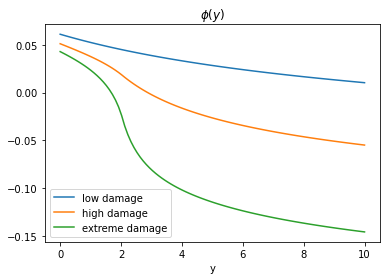

In [9]:
plt.plot(y_grid, ϕ_list[0], label='low damage')
plt.plot(y_grid, ϕ_list[1], label='high damage')
plt.plot(y_grid, ϕ_list[2], label='extreme damage')
plt.legend()
plt.title(r'$\phi(y)$')
plt.xlabel('y')
# plt.savefig('figure.pdf')

In [43]:
# Change grid setting
n_y_new = 100
y_min_new = 1e-10
y_max_new = 2. - 2./100
y_grid_new = np.linspace(y_min_new, y_max_new, n_y_new)

# Compute boundary condition
ϕ_mean = np.average(np.array(ϕ_list), axis=0, weights=λ_2p_prior)
ϕ_bar = np.interp(y_grid_new, y_grid, ϕ_mean)

# Set up tuning parameter for jump process
K = 1.
ρ = 1e-3

pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, ϕ_bar, K, ρ)

ϕ_grid, e_grid = hjb_modified_jump_process(y_grid, model_paras=pde_paras,
                                           v0=None, ϵ=.5, tol=1e-8, max_iter=1000)

Iteration 1: LHS Error: 0.11112760498834723; RHS Error 0.11396532105651147
Iteration 2: LHS Error: 0.0011397811033518127; RHS Error 0.008832594372876201
Iteration 3: LHS Error: 3.5968687296709934e-05; RHS Error 0.01481370606691712
Iteration 4: LHS Error: 2.7025148280235278e-05; RHS Error 0.016991731051348324
Iteration 5: LHS Error: 1.0394395792791278e-05; RHS Error 0.0070374291335859596
Iteration 6: LHS Error: 4.631540000521461e-06; RHS Error 0.006936800724282932
Iteration 7: LHS Error: 1.969687479494442e-06; RHS Error 0.006956056882032158
Iteration 8: LHS Error: 9.207454686313565e-06; RHS Error 0.009993906104114103
Iteration 9: LHS Error: 8.709718927177312e-06; RHS Error 0.012609891534978601
Iteration 10: LHS Error: 2.3789712662911078e-05; RHS Error 0.010041580618889157
Iteration 11: LHS Error: 9.48098113634499e-06; RHS Error 0.019071944388457496
Iteration 12: LHS Error: 1.6187795449124076e-05; RHS Error 0.016975117581296217
Iteration 13: LHS Error: 4.491026663056008e-06; RHS Error 0.

Iteration 123: LHS Error: 2.2037952682074646e-05; RHS Error 0.01759244335146093
Iteration 124: LHS Error: 2.2424397912015892e-05; RHS Error 0.012169470290700701
Iteration 125: LHS Error: 8.879910656026113e-06; RHS Error 0.007027830228320653
Iteration 126: LHS Error: 7.428046891522211e-06; RHS Error 0.007046467439153048
Iteration 127: LHS Error: 1.9358099697941444e-05; RHS Error 0.021104948948334368
Iteration 128: LHS Error: 1.5622053881642062e-05; RHS Error 0.006232473615540357
Iteration 129: LHS Error: 1.302599697793061e-05; RHS Error 0.006172358291323121
Iteration 130: LHS Error: 6.691402916148004e-06; RHS Error 0.0125452736152738
Iteration 131: LHS Error: 2.220269633797234e-05; RHS Error 0.008594602103556781
Iteration 132: LHS Error: 1.1719509106292159e-05; RHS Error 0.004431689854939691
Iteration 133: LHS Error: 1.3895139423590608e-05; RHS Error 0.0060336387712141
Iteration 134: LHS Error: 3.890029929844163e-05; RHS Error 0.013961232663177725
Iteration 135: LHS Error: 1.18851662603

Iteration 247: LHS Error: 2.225870035055255e-05; RHS Error 0.008749329388294314
Iteration 248: LHS Error: 3.955444281014686e-06; RHS Error 0.009683284782425972
Iteration 249: LHS Error: 2.1498143967096928e-05; RHS Error 0.017196447910464485
Iteration 250: LHS Error: 2.1619627208660508e-05; RHS Error 0.01511083219206455
Iteration 251: LHS Error: 4.038206101945885e-05; RHS Error 0.024677610154412832
Iteration 252: LHS Error: 4.200284635538093e-05; RHS Error 0.009707687715035718
Iteration 253: LHS Error: 1.7385189011842606e-05; RHS Error 0.01765932257580971
Iteration 254: LHS Error: 2.024952694935217e-05; RHS Error 0.009010435663810767
Iteration 255: LHS Error: 4.393723532565563e-05; RHS Error 0.005639131917632767
Iteration 256: LHS Error: 4.0269589138899886e-05; RHS Error 0.007106520255319992
Iteration 257: LHS Error: 7.942115810517791e-06; RHS Error 0.012691187341175691
Iteration 258: LHS Error: 8.466426932370041e-06; RHS Error 0.007013760935212332
Iteration 259: LHS Error: 1.1991864966

Iteration 375: LHS Error: 2.6377434502164454e-05; RHS Error 0.020985380471714166
Iteration 376: LHS Error: 2.6311129976280823e-05; RHS Error 0.0034565850884717975
Iteration 377: LHS Error: 4.0240163536924e-05; RHS Error 0.007071027344149883
Iteration 378: LHS Error: 8.079499118740507e-06; RHS Error 0.012605047918583523
Iteration 379: LHS Error: 1.233364283648175e-05; RHS Error 0.005911266560197248
Iteration 380: LHS Error: 1.7313811979696725e-05; RHS Error 0.018382222818800642
Iteration 381: LHS Error: 2.8287996813564087e-05; RHS Error 0.00855062101088322
Iteration 382: LHS Error: 4.554443362086991e-06; RHS Error 0.015643777569493977
Iteration 383: LHS Error: 2.7105169965971343e-05; RHS Error 0.019731378547788836
Iteration 384: LHS Error: 9.549370844602612e-06; RHS Error 0.010642039248494939
Iteration 385: LHS Error: 2.534890925799671e-05; RHS Error 0.013495532826539147
Iteration 386: LHS Error: 2.5143323539422724e-05; RHS Error 0.010442076605130524
Iteration 387: LHS Error: 2.39700555

Iteration 502: LHS Error: 2.271880222202982e-05; RHS Error 0.007002175338172378
Iteration 503: LHS Error: 7.6093362862683644e-06; RHS Error 0.008590510177214128
Iteration 504: LHS Error: 9.715340652000082e-06; RHS Error 0.0070101439875429605
Iteration 505: LHS Error: 3.9304905912827814e-05; RHS Error 0.0026879793960574716
Iteration 506: LHS Error: 4.145925250983312e-05; RHS Error 0.007168484818929954
Iteration 507: LHS Error: 2.28389884828345e-05; RHS Error 0.02432327498802067
Iteration 508: LHS Error: 3.0381734415232953e-05; RHS Error 0.019224828399273974
Iteration 509: LHS Error: 6.134944204316817e-07; RHS Error 0.007070230232404384
Iteration 510: LHS Error: 7.390831622530736e-06; RHS Error 0.007072170526068788
Iteration 511: LHS Error: 1.5570134548434367e-05; RHS Error 0.016925608495824918
Iteration 512: LHS Error: 1.3278368898597681e-05; RHS Error 0.015378108159310955
Iteration 513: LHS Error: 1.7681094506762085e-05; RHS Error 0.015654641338201714
Iteration 514: LHS Error: 1.292790

Iteration 631: LHS Error: 3.8090023462188094e-05; RHS Error 0.006271775315141781
Iteration 632: LHS Error: 3.82409603082029e-05; RHS Error 0.007076064814391714
Iteration 633: LHS Error: 1.3362012441439641e-05; RHS Error 0.0112290500910035
Iteration 634: LHS Error: 1.3479754308085012e-05; RHS Error 0.007014684843568375
Iteration 635: LHS Error: 1.0627009179059455e-05; RHS Error 0.006851164986471758
Iteration 636: LHS Error: 1.2035255048371829e-05; RHS Error 0.008565394389563608
Iteration 637: LHS Error: 1.54768005263331e-05; RHS Error 0.011435874548041625
Iteration 638: LHS Error: 2.2170194941190102e-05; RHS Error 0.009673514626527435
Iteration 639: LHS Error: 1.3966449230740086e-06; RHS Error 0.008346349147828391
Iteration 640: LHS Error: 1.3825445150938975e-05; RHS Error 0.012197005536265237
Iteration 641: LHS Error: 3.6738032669209053e-06; RHS Error 0.00869941789466111
Iteration 642: LHS Error: 2.3673065271775928e-05; RHS Error 0.013841765151966001
Iteration 643: LHS Error: 4.1752008

Iteration 756: LHS Error: 4.008431856918071e-05; RHS Error 0.0038944688418780515
Iteration 757: LHS Error: 3.0050051550052637e-05; RHS Error 0.021167221676876125
Iteration 758: LHS Error: 1.8276214467344287e-05; RHS Error 0.010517708633855705
Iteration 759: LHS Error: 2.5943841047718075e-05; RHS Error 0.014182983531839
Iteration 760: LHS Error: 2.6417901177258618e-05; RHS Error 0.010968161763699413
Iteration 761: LHS Error: 7.911765203559573e-06; RHS Error 0.007930787468282574
Iteration 762: LHS Error: 7.235804665939316e-06; RHS Error 0.00703285550435595
Iteration 763: LHS Error: 4.912157486436364e-06; RHS Error 0.01222236018776357
Iteration 764: LHS Error: 2.091892041540533e-05; RHS Error 0.019224974847318776
Iteration 765: LHS Error: 5.178289521858004e-05; RHS Error 0.012151333009356335
Iteration 766: LHS Error: 1.6909780571783273e-05; RHS Error 0.006418644929112816
Iteration 767: LHS Error: 3.3247500162716936e-05; RHS Error 0.008590523148455986
Iteration 768: LHS Error: 2.9818846220

Iteration 882: LHS Error: 1.2445993421886237e-05; RHS Error 0.013764750986396734
Iteration 883: LHS Error: 2.624230106641756e-05; RHS Error 0.013708794430840499
Iteration 884: LHS Error: 3.2766588738145086e-05; RHS Error 0.01997530349393628
Iteration 885: LHS Error: 2.4914930343247765e-05; RHS Error 0.009650243722049368
Iteration 886: LHS Error: 2.888622978624439e-05; RHS Error 0.003653500616707106
Iteration 887: LHS Error: 2.6940050071422306e-05; RHS Error 0.009491098859513158
Iteration 888: LHS Error: 1.3191137180290635e-05; RHS Error 0.011843951607716008
Iteration 889: LHS Error: 1.3946155006806793e-05; RHS Error 0.012071490852832767
Iteration 890: LHS Error: 1.1955679975014788e-05; RHS Error 0.005849283015429307
Iteration 891: LHS Error: 1.6401546027097758e-05; RHS Error 0.01493047294667349
Iteration 892: LHS Error: 2.6759681250806966e-05; RHS Error 0.010547258917725344
Iteration 893: LHS Error: 2.908217619200515e-05; RHS Error 0.017140625832809064
Iteration 894: LHS Error: 2.75995

In [39]:
K*np.exp(ρ*(y_grid_new-λ_bar))/(1.-np.exp(ρ*(y_grid_new-λ_bar)))

array([ 0.15651764,  0.160186  ,  0.16395251,  0.1678204 ,  0.17179301,
        0.17587382,  0.18006647,  0.18437473,  0.18880256,  0.19335409,
        0.19803363,  0.20284566,  0.20779491,  0.21288629,  0.21812494,
        0.22351626,  0.2290659 ,  0.23477977,  0.24066407,  0.24672532,
        0.25297035,  0.25940635,  0.26604085,  0.2728818 ,  0.27993756,
        0.28721692,  0.29472915,  0.30248404,  0.31049191,  0.31876366,
        0.32731082,  0.33614557,  0.34528082,  0.35473025,  0.36450835,
        0.37463052,  0.38511311,  0.39597351,  0.40723022,  0.41890296,
        0.43101276,  0.44358208,  0.45663492,  0.47019695,  0.48429569,
        0.49896066,  0.51422354,  0.53011842,  0.54668199,  0.56395384,
        0.58197671,  0.60079681,  0.62046422,  0.64103328,  0.66256302,
        0.68511775,  0.7087676 ,  0.73358923,  0.75966658,  0.7870918 ,
        0.81596622,  0.84640159,  0.87852138,  0.91246245,  0.94837681,
        0.98643386,  1.02682294,  1.06975631,  1.11547276,  1.16

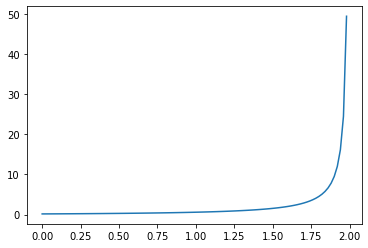

In [38]:
plt.plot(y_grid_new, K*np.exp(ρ*(y_grid_new-λ_bar))/(1.-np.exp(ρ*(y_grid_new-λ_bar))))

Text(0.5, 0, 'y')

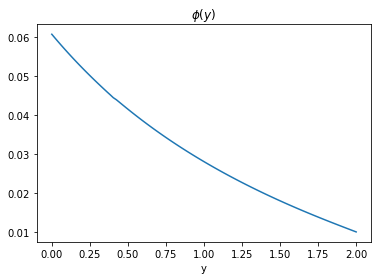

In [19]:
plt.plot(y_grid_new, ϕ_grid)
plt.title(r'$\phi(y)$')
plt.xlabel('y')
# plt.savefig('figure.pdf')

Text(0.5, 0, 'y')

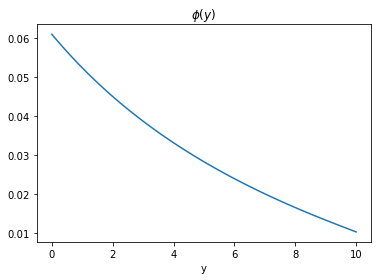

In [15]:
plt.plot(y_grid, ϕ_grid)
plt.title(r'$\phi(y)$')
plt.xlabel('y')
# plt.savefig('figure.pdf')

In [ ]:
ϕ_bar